   Unnamed: 0       car_name    brand     model  vehicle_age  km_driven  \
0           0    Maruti Alto   Maruti      Alto            9     120000   
1           1  Hyundai Grand  Hyundai     Grand            5      20000   
2           2    Hyundai i20  Hyundai       i20           11      60000   
3           3    Maruti Alto   Maruti      Alto            9      37000   
4           4  Ford Ecosport     Ford  Ecosport            6      30000   

  seller_type fuel_type transmission_type  mileage  engine  max_power  seats  \
0  Individual    Petrol            Manual    19.70     796      46.30      5   
1  Individual    Petrol            Manual    18.90    1197      82.00      5   
2  Individual    Petrol            Manual    17.00    1197      80.00      5   
3  Individual    Petrol            Manual    20.92     998      67.10      5   
4      Dealer    Diesel            Manual    22.77    1498      98.59      5   

   selling_price  
0         120000  
1         550000  
2         2

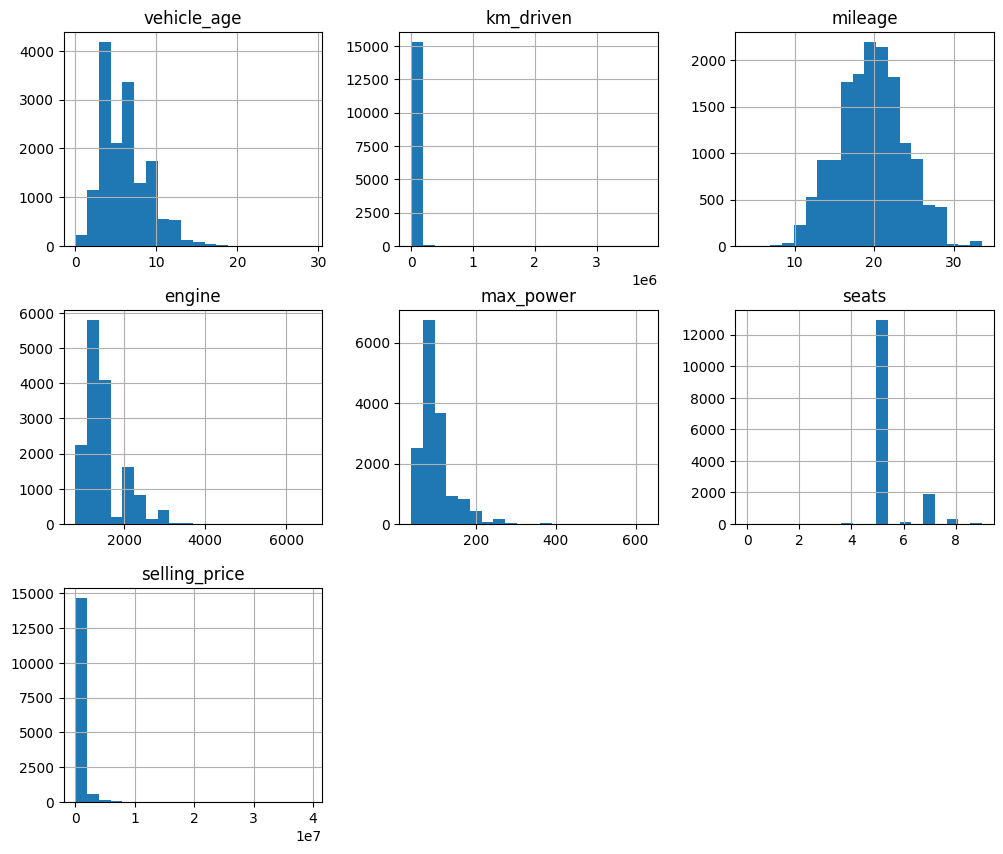

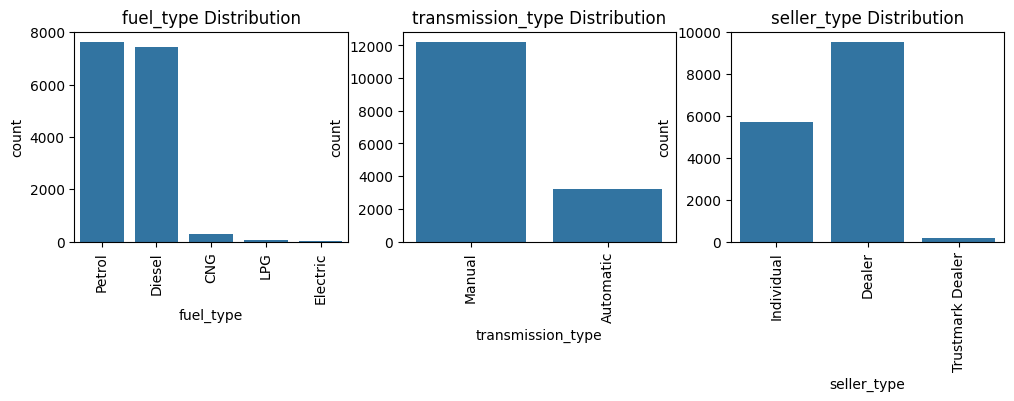

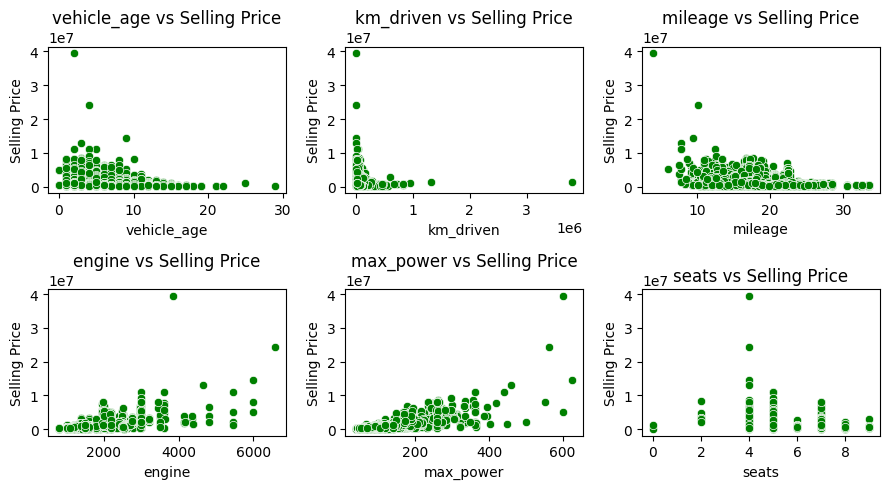

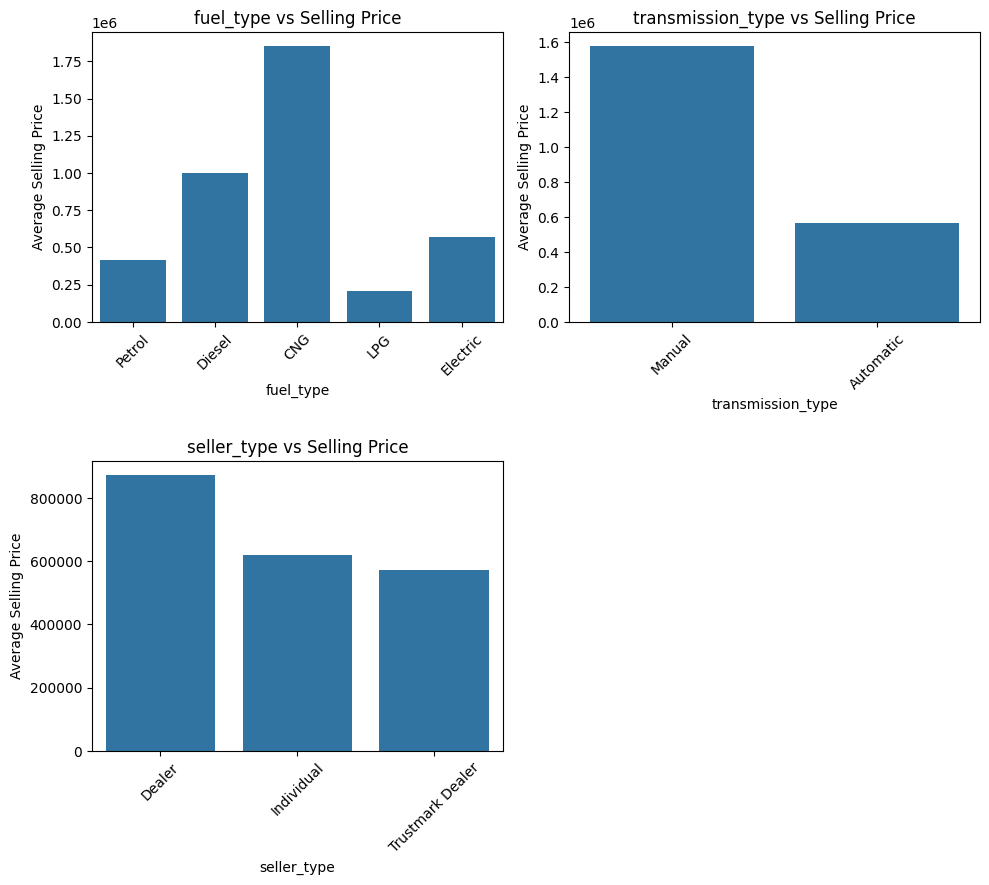

               vehicle_age  km_driven   mileage    engine  max_power  \
vehicle_age       1.000000   0.333891 -0.257394  0.098965   0.005208   
km_driven         0.333891   1.000000 -0.105239  0.192885   0.044421   
mileage          -0.257394  -0.105239  1.000000 -0.632987  -0.533128   
engine            0.098965   0.192885 -0.632987  1.000000   0.807368   
max_power         0.005208   0.044421 -0.533128  0.807368   1.000000   
seats             0.030791   0.192830 -0.440280  0.551236   0.172257   
selling_price    -0.241851  -0.080030 -0.305549  0.585844   0.750236   

                  seats  selling_price  
vehicle_age    0.030791      -0.241851  
km_driven      0.192830      -0.080030  
mileage       -0.440280      -0.305549  
engine         0.551236       0.585844  
max_power      0.172257       0.750236  
seats          1.000000       0.115033  
selling_price  0.115033       1.000000  


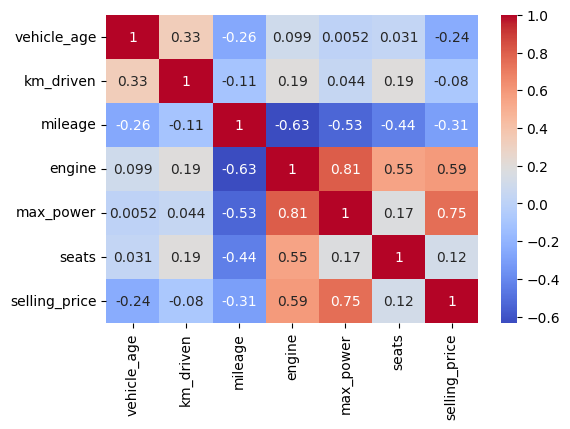

Training set size: (12328, 13), Testing set size: (3083, 13)
[-108277.53801016 1009235.25889475  370728.28913403  808326.52649625
  763166.10976418]
Mean Squared Error (MSE): 299955226424.4811
Root Mean Squared Error (RMSE): 547681.6834845594
R-squared: 0.6403840488404247


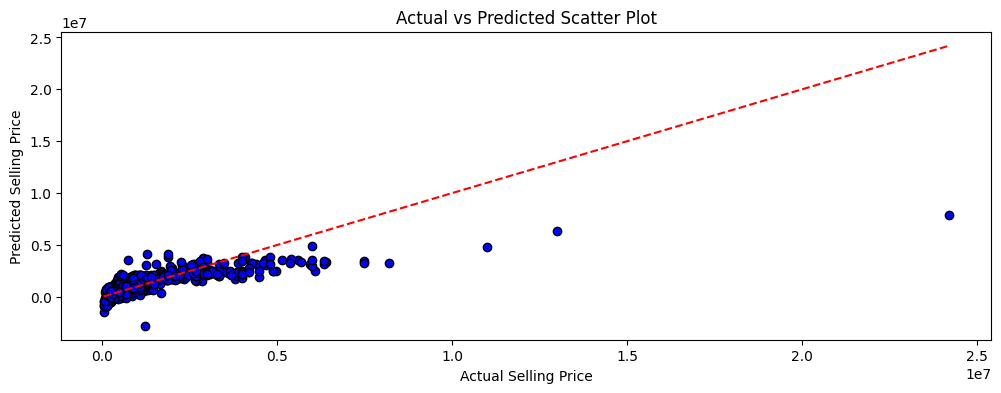

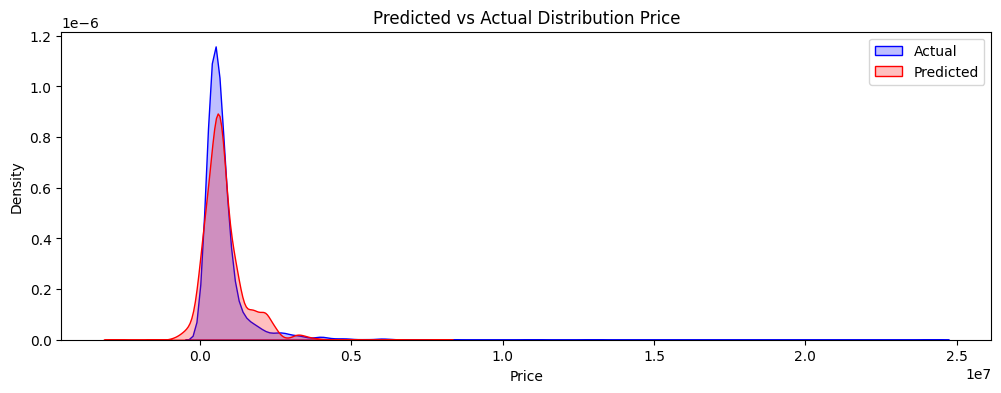

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("Cardekho (1).csv")

# Check the first few rows of the dataset
print(df.head())

# Check the columns in the dataset
print(df.columns)

# Get a concise summary of the dataset
print(df.info())

# Check the shape of the data (rows and columns)
print(df.shape)

# Data Cleaning: Drop unwanted columns
df.drop(columns=['Unnamed: 0'], inplace=True)

# Checking null values
print(df.isnull().sum())

# Checking Duplicate values
print(df.duplicated().sum())

# Statistical summary of numerical columns
print(df.describe())

# Exploratory Data Analysis (EDA)
# Univariate Analysis (Examining individual variables)
# Plot histograms for numerical features
df.hist(figsize=(12, 10), bins=20)
plt.show()

# Categorical features
categorical_features = ["fuel_type", "transmission_type", "seller_type"]
plt.figure(figsize=(12, 6))

# Loop through each categorical feature and plot the count plot
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=feature, data=df)
    plt.title(f'{feature} Distribution')
    plt.xticks(rotation=90)
plt.show()

# Bivariate Analysis (Examining the relationship between two variables)
# Numerical features
numerical_features = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

# Create subplots for scatter plots
plt.figure(figsize=(9, 5))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=df[feature], y=df['selling_price'], color='green')
    plt.title(f'{feature} vs Selling Price')
    plt.xlabel(feature)
    plt.ylabel('Selling Price')
plt.tight_layout()
plt.show()

# Categorical features to analyze
categorical_features = ['fuel_type', 'transmission_type', 'seller_type']
plt.figure(figsize=(10, 12))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 2, i+1)
    sns.barplot(x=df[feature].value_counts().index, y=df.groupby(feature)['selling_price'].mean().values)
    plt.title(f'{feature} vs Selling Price')
    plt.xlabel(feature)
    plt.ylabel('Average Selling Price')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Multivariate Analysis (Correlation between multiple variables)
# List of numerical features you want to calculate correlation for
numerical_features = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']

# Calculate the correlation matrix for selected numerical features
correlation_matrix = df[numerical_features].corr()
print(correlation_matrix)

# Plot the heatmap for checking the correlation
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Data Preprocessing
model_data = df.copy()

# Drop irrelevant columns
model_data.drop(labels=['car_name', 'brand', 'model', 'seller_type'], axis=1, inplace=True)

# Encode categorical variables
model_data = pd.get_dummies(model_data, dtype=float)

# Define features (X) and target (Y)
X = model_data.drop('selling_price', axis=1)  # Independent variables
Y = model_data['selling_price']  # Target variable

# Splitting the Data into Training and Test Sets
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2)
print(f"Training set size: {train_X.shape}, Testing set size: {test_X.shape}")

# Train the Regression Model
regressor = LinearRegression()
regressor.fit(train_X, train_Y)

# Predict on the test data
predictions = regressor.predict(test_X)

# Show the first few predicted values
print(predictions[:5])

# Model Evaluation
mse = mean_squared_error(test_Y, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test_Y, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

# Visualizing the Predictions
# Actual vs Predicted Scatter Plot
plt.figure(figsize=(12, 4))
plt.scatter(test_Y, predictions, color='blue', edgecolor='black')
plt.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], color='red', linestyle='--')  # Ideal Line
plt.title('Actual vs Predicted Scatter Plot')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.show()

# Plotting Actual vs Predicted Distribution Price
plt.figure(figsize=(12, 4))
sns.kdeplot(test_Y, color='blue', label='Actual', fill=True)
sns.kdeplot(predictions, color='red', label='Predicted', fill=True)
plt.title('Predicted vs Actual Distribution Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()